# 'Reproducing' the Third Figure from the Lunch Talk (with Unresolved Multiplicity) (No additional IFMR)
# Using Age Table 2 Solution 1 from Lu et. al 2013. 
In this test notebook, I will examine the code that should create the juxtaposed KLF's of stars from the Galacitc Center and from their MIST and BPASS cluster counterparts. Final product should be similar to first figure in Figure 11 in Lu et al. 2013 (except we are using scaling).

Firstly, I grab some code from the  jlu_python/jlu/papers/lu_gc_imf.py directory in the Moving Universe Lab's computers. We try to load the observed KLF of the galactic center with completeness correction.

In [1]:
# After spending a bit of time figuring out how pickling files and loading works
# I have finally done it.

# These come from 
import pickle
import sys
from spisea import evolution

class dat:
    datin = "Description: Container of Data"

def load_klf_by_radius(rmin=0, rmax=30, mask_for_log=False):
    pickleFile = ('%sklf_r_%.1f_%.1f.dat' %
                  ('/Users/jlu/work/gc/imf/klf/current/', rmin, rmax))
    _in = open(pickleFile, 'rb')
    d = dat()
    d.Kp = pickle.load(_in,encoding='bytes')
    d.N = pickle.load(_in, encoding='bytes')
    d.eN = pickle.load(_in, encoding='bytes')

    d.N_ext = pickle.load(_in, encoding='bytes')
    d.eN_ext = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')
    d.eN_ext_cmp_sp_im = pickle.load(_in, encoding='bytes')

    d.KLF = pickle.load(_in, encoding='bytes')
    d.eKLF = pickle.load(_in, encoding='bytes')

    d.KLF_ext = pickle.load(_in,
                            encoding='bytes')
    d.eKLF_ext = pickle.load(_in,
                             encoding='bytes')

    d.KLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_cmp_sp = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_im = pickle.load(_in,
                                      encoding='bytes')
    d.eKLF_ext_cmp_sp_im = pickle.load(_in,
                                       encoding='bytes')

    d.N_noWR = pickle.load(_in, encoding='bytes')
    d.eN_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eN_ext_noWR = pickle.load(_in, encoding='bytes')

    d.N_ext_cmp_sp_noWR = pickle.load(_in,
                                      encoding='bytes')
    d.eN_ext_cmp_sp_noWR = pickle.load(_in,
                                       encoding='bytes')

    d.N_ext_cmp_sp_im_noWR = pickle.load(_in,
                                         encoding='bytes')
    d.eN_ext_cmp_sp_im_noWR = pickle.load(_in,
                                          encoding='bytes')

    d.KLF_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_noWR = pickle.load(_in, encoding='bytes')
    d.eKLF_ext_noWR = pickle.load(_in, encoding='bytes')

    d.KLF_ext_cmp_sp_noWR = pickle.load(_in,
                                        encoding='bytes')
    d.eKLF_ext_cmp_sp_noWR = pickle.load(_in,
                                         encoding='bytes')

    d.KLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                           encoding='bytes')
    d.eKLF_ext_cmp_sp_im_noWR = pickle.load(_in,
                                            encoding='bytes')

    d.comp_spec_ext = pickle.load(_in, encoding='bytes')
    d.comp_imag_ext = pickle.load(_in, encoding='bytes')

    if mask_for_log:
        # Repair for zeros since we are plotting in semi-log-y
        d.eN = np.ma.masked_where(d.N <= 0, d.eN)
        d.N = np.ma.masked_where(d.N <= 0, d.N)

        d.eN_ext = np.ma.masked_where(d.N_ext <= 0, d.eN_ext)
        d.N_ext = np.ma.masked_where(d.N_ext <= 0, d.N_ext)

        d.eN_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                             0, d.eN_ext_cmp_sp)
        d.N_ext_cmp_sp = np.ma.masked_where(d.N_ext_cmp_sp <=
                                            0, d.N_ext_cmp_sp)

        d.eN_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                                0, d.eN_ext_cmp_sp_im)
        d.N_ext_cmp_sp_im = np.ma.masked_where(d.N_ext_cmp_sp_im <=
                                               0, d.N_ext_cmp_sp_im)
        
        d.eKLF = np.ma.masked_where(d.KLF <= 0, d.eKLF)
        d.KLF = np.ma.masked_where(d.KLF <= 0, d.KLF)
        
        d.eKLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                        d.eKLF_ext)
        d.KLF_ext = np.ma.masked_where(d.KLF_ext <= 0,
                                       d.KLF_ext)
        
        d.eKLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                               d.eKLF_ext_cmp_sp)
        d.KLF_ext_cmp_sp = np.ma.masked_where(d.KLF_ext_cmp_sp <= 0, 
                                              d.KLF_ext_cmp_sp)
        
        d.eKLF_ext_cmp_sp_im = (np.ma.
                                masked_where(d.KLF_ext_cmp_sp_im <=
                                             0, d.eKLF_ext_cmp_sp_im))
        d.KLF_ext_cmp_sp_im = (np.ma.
                               masked_where(d.KLF_ext_cmp_sp_im <=
                                            0, d.KLF_ext_cmp_sp_im))


    _in.close()

    return d

The following line loads data from /Users/jlu/work/gc/imf/klf/current/klf_r_0.0_30.0.dat. Recall I use the noWR option as the corresponding figure 

In [2]:
import numpy as np
result = load_klf_by_radius(mask_for_log=True)
magBin = result.Kp[1] - result.Kp[0]
# Note that the < 16 comes from the original code!
idx = np.where(result.Kp < 16)[0]

Now, I create the BPASS isochrone for that specific age. $10^{6.62}$  years of age (around 6 million years). From that isochrone, I will create a cluster using an IMF of $\alpha = 1.7$.

In [3]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.62, 2.7,
                                       7900, 0.0, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1794: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to logg=3.50 for T= 26185 logg=3.00
Changing to T= 50000 for T=167251 logg=5.76
Changing to logg=5.00 for T=167251 logg=5.76
Changing to T= 50000 for T=120080 logg=5.33
Changing to logg=5.00 for T=120080 logg=5.33
Changing to logg=4.00 for T= 32831 logg=3.90
Changing to T= 50000 for T=118484 logg=5.31
Changing to logg=5.00 for T=118484 logg=5.31
Changing to T= 50000 for T= 95457 logg=4.73
Changing to logg=5.00 for T= 95457 logg=4.73
Changing to T= 50000 for T=116161 logg=5.12
Changing to logg=5.00 for T=116161 logg=5.12
Changing to logg=3.00 for T= 19983 logg=2.46
Changing to T= 50000 for T=118664 logg=5.16
Changing to logg=5.00 for T=118664 logg=5.16
Changing to T= 50000 for T=168531 logg=5.77
Changing to logg=5.00 for T=168531 logg=5.77
Changing to logg=3.00 for T= 25165 logg=2.92
Changing to logg=4.00 for T= 33667 logg=3.84
Changing to T= 50000 for T=112365 logg=5.21
Changing to logg=5.00 for T=112365 logg=5.21
Changing to T= 50000 for T=108808 logg=5.16
Changing to logg=5.

Creating the scaling factor (note I built off of my renditions of Figure 1 of the paper and keep in mind that scaling factor only changes slightly the representation of the data) and generate the cluster.

In [4]:
area = 150  # arcsec^2
# Think of how many stars per area would there be in a similar cluster
# but with lower mass. We use scaling.
scaleFactorBPS = ((17000 /
                   1e6) /area)

# The cluster itself
from spisea import imf, ifmr, evolution
import numpy as np
# If we want to use control group, let's use multiplicity = None.
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 150]),
                                         np.array([-1.7]),
                                         multiplicity=
                                         (imf.multiplicity.
                                          MultiplicityUnresolved()))
import time
t1 = time.time()
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None)
t2 = time.time()
t_time = t2 - t1

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff
Interpolation for: L
Interpolation for: logg
Interpolation for: isWR
Interpolation for: mass_current
Interpolation for: phase
Interpolation for: m_nirc2_Kp


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual BPASS stars' magnitudes (not necessarily just of star systems)

In [5]:
totl_BPASS = (BPASS_Cluster.star_systems['m_nirc2_Kp']
               [np.where((BPASS_Cluster.star_systems['isWR']==0))[0]])

Below, I produce my first plot that demonstrates the problem with BPASS's IMF. I also set up bins and BPASS weights, which I will use in the next figure.

Text(0.5, 1.0, 'KLF of clusters at Age = 4 Myr (Using MultiplicityUnresolved)')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


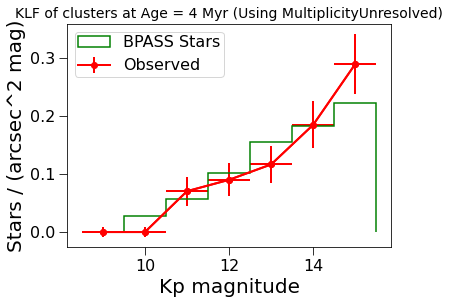

In [6]:
import matplotlib.pyplot as py
# Primary star fluxes
klf_mag_bins = np.arange(9.0, 17, 1.0)
binsKp = klf_mag_bins
binEdges = binsKp[0:-1] + (binsKp[1:] - binsKp[0:-1]) / 2.0

weightsBPS = np.array([1.0 for x in totl_BPASS])
weightsBPS *= scaleFactorBPS
(n1, b1, p1) = py.hist(totl_BPASS, bins=binEdges, weights=weightsBPS,
                       histtype='step', color='green',
                       label='BPASS Stars', align='mid',
                       linewidth=1.5)
py.errorbar(result.Kp[idx],
            result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, linewidth=2)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
            label='Observed')
py.legend(loc='upper left', numpoints=1)
py.xlabel('Kp magnitude')
py.ylabel('Stars / (arcsec^2 mag)')
py.title('KLF of clusters at Age = %d Myr (Using MultiplicityUnresolved)' % (10**(6.62 - 6)),
         fontsize=14)

**Now I create the MIST v1 cluster and then make the final figure of the talk.**

In [7]:
MIST_iso = synthetic.IsochronePhot(6.62, 2.7, 7900, 0.0, recomp=False,
                                   filters=['nirc2,Kp'])
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)
Merged_iso = synthetic.IsochronePhot(6.62, 2.7, 7900, 0.0,
                                     evo_model=
                                     evolution.MergedBaraffePisaEkstromParsec(),
                                     recomp=False,
                                     filters=['nirc2,Kp'])
Merged_Clus = synthetic.ResolvedCluster(Merged_iso, custom_IMF,
                                         1000000,
                                         ifmr=None)

Changing to logg=4.00 for T= 32989 logg=4.00
Changing to logg=4.00 for T= 33286 logg=3.98
Changing to logg=4.00 for T= 33563 logg=3.97
Changing to logg=4.00 for T= 33826 logg=3.96
Changing to logg=4.00 for T= 34083 logg=3.95
Changing to logg=4.00 for T= 34350 logg=3.93
Changing to logg=4.00 for T= 34634 logg=3.92
Changing to logg=4.00 for T= 34902 logg=3.90
Changing to logg=4.00 for T= 35110 logg=3.88
Changing to logg=4.00 for T= 35292 logg=3.86
Changing to logg=4.00 for T= 35451 logg=3.84
Changing to logg=4.00 for T= 35552 logg=3.82
Changing to logg=4.00 for T= 35576 logg=3.81
Changing to logg=4.00 for T= 35592 logg=3.80
Changing to logg=4.00 for T= 35594 logg=3.79
Changing to logg=4.00 for T= 35589 logg=3.78
Changing to logg=4.00 for T= 35583 logg=3.77
Changing to logg=4.00 for T= 35586 logg=3.76
Changing to logg=4.00 for T= 35581 logg=3.74
Changing to logg=4.00 for T= 35554 logg=3.73
Changing to logg=4.00 for T= 35513 logg=3.71
Changing to logg=4.00 for T= 35458 logg=3.70
Changing t

In the next cell, I make sure that I am NOT including WR stars in my plots and that I am not including stars with magnitudes greater than cutoff (K' = 15.5)
here, I want to make an array like object of individual MIST stars' magnitudes (not necessarily just of star systems)

In [8]:
totl_mist = (MIST_Cluster.star_systems['m_nirc2_Kp']
             [np.where((MIST_Cluster.star_systems['isWR'] == 0))[0]])
totl_merged = (Merged_Clus.star_systems['m_nirc2_Kp']
               [np.where((Merged_Clus.star_systems['isWR'] == 0))[0]])
# Now find the magintudes of just the primary star

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


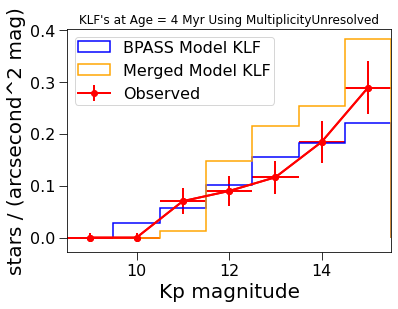

In [9]:
import matplotlib.pyplot as py
from matplotlib.colors import LogNorm
# Setting up framework so that I can scale the number of stars in mass bin
# into density: number of stars per square arcsecond.

# I won't be using the sum of initial masses of only existing stars for
# the scale factors

mist_scale = scaleFactorBPS
merged_scale = scaleFactorBPS
weights_MST = np.array([1.0 for x in totl_mist])
weights_MST *= mist_scale
weights_merged = np.array([1.0 for x in totl_merged])
weights_merged *= merged_scale
# Binning the K' magnitudes into their respective bins

py.hist(totl_BPASS, bins=binEdges, histtype='step',
        weights=weightsBPS, color='blue',
        label='BPASS Model KLF',
        align='mid', linewidth=1.5)
py.hist(totl_merged, bins=binEdges, histtype='step',
        weights=weights_merged, color='orange',
        label='Merged Model KLF',
        align='mid', linewidth=1.5)
py.errorbar(result.Kp[idx], result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', xerr=magBin/2.0, capsize=0, linewidth=2)
py.errorbar(result.Kp[idx],result.KLF_ext_cmp_sp_im_noWR[idx],
            fmt='ro-', yerr=result.eKLF_ext_cmp_sp_im_noWR[idx],
            linewidth=2,
       label='Observed')
py.xlim(8.5, 15.5)
py.xlabel('Kp magnitude')
py.ylabel("stars / (arcsecond^2 mag)")
py.title("KLF's at Age = %d Myr Using MultiplicityUnresolved" % (10**(6.62- 6)), fontsize=12)
py.legend(loc='upper left', numpoints=1)
py.savefig("StillBadKLF1CurrPar.png")

Now checking scatter plot to see which regions had stars that did not properly interpolate mass_current. I will be taking several "snapshots".

NOTE: I do not count merged star systems as stars that weren't able to be interpolated. For all other cases, if either primary mass_current or secondary star mass current is a NaN then I count it as not able to be interpolated.

In [10]:
title_default = "Plot of primary secondary pairs of BPASS isochrone and cluster"
def plot_scatter(clus, x_lim, y_lim, label1, label2, title, savefile):
    py.figure(figsize = (12, 12))
    py.plot(clus.rejected_prims,
            clus.rejected_sec,
            "r+",  label=label1)
    py.plot(clus.good_systems[:, 0],
            clus.good_systems[:, 1],
            "g+", label=label2)
    py.plot(clus.iso.primaries['mass'],
            clus.iso.secondaries['mass'],
            "k*", label="primary-secondary pair intial masses of stars from isochrone")
    py.xlim(x_lim[0], x_lim[1])
    py.ylim(y_lim[0], y_lim[1])
    py.xlabel("Primary star intial mass in $M_{\odot}$")
    py.ylabel("Secondary star intial mass in $M_{\odot}$")
    py.title(title)
    py.legend(prop={'size' : 11})
    py.savefig(savefile)

Now trying to explore which stars had their current masses interpolated properly and which did not.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


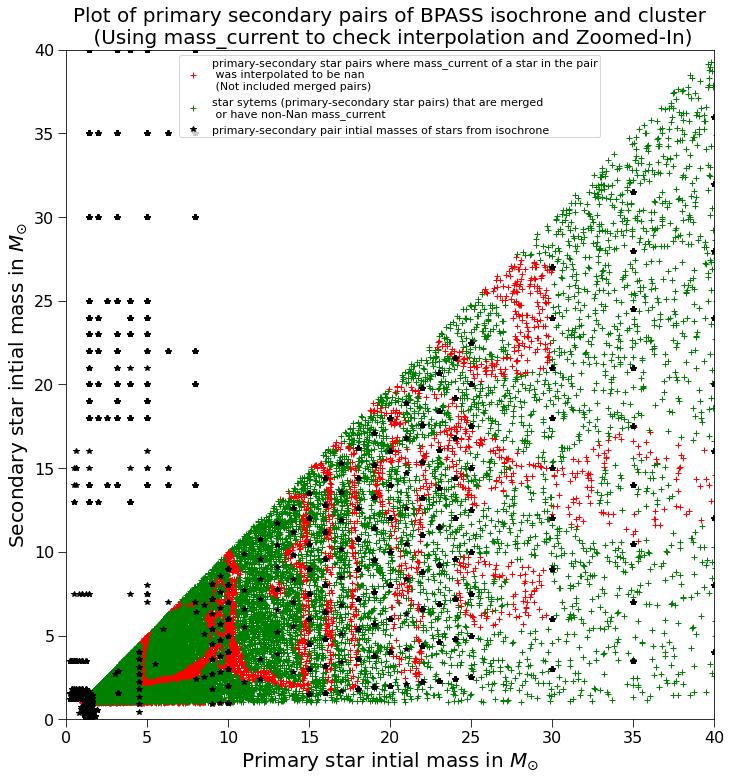

In [11]:
label1=("primary-secondary star pairs where " +
        "mass_current of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
label2=("star sytems (primary-secondary star pairs) that" +
        " are merged\n or have non-Nan mass_current")
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using mass_current to check interpolation and Zoomed-In)","Scatter1T2S1.png")

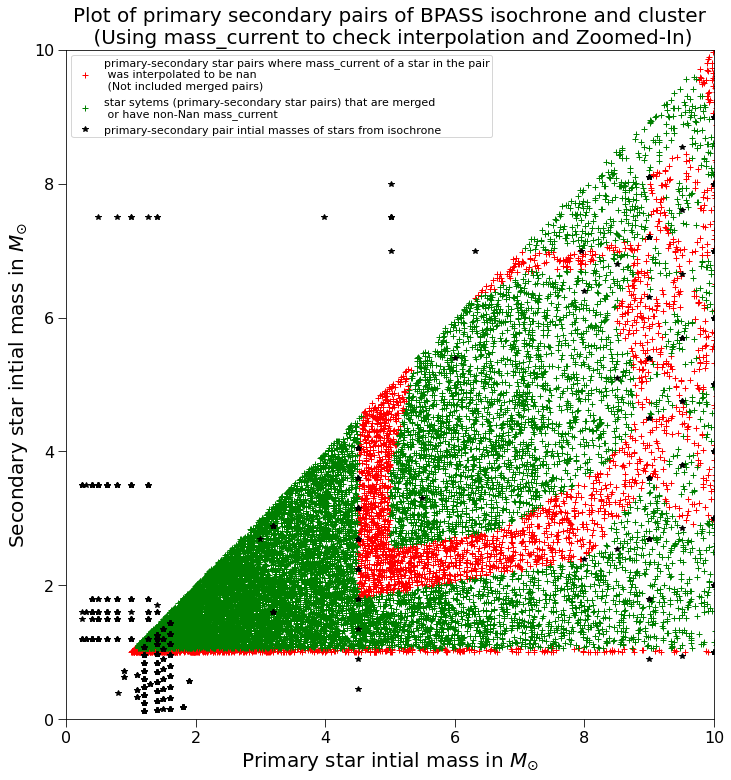

In [12]:
plot_scatter(BPASS_Cluster, (0, 10.0), (0, 10.0), label1, label2,
             title_default +
             "\n (Using mass_current to check interpolation and Zoomed-In)",
             "Scatter1T2S1Zoomd1.png")

Now trying to explore which stars had their logg interpolated properly and which did not.

In [13]:
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None, tests='logg')

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff
Interpolation for: L
Interpolation for: logg
Interpolation for: isWR
Interpolation for: mass_current
Interpolation for: phase
Interpolation for: m_nirc2_Kp


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


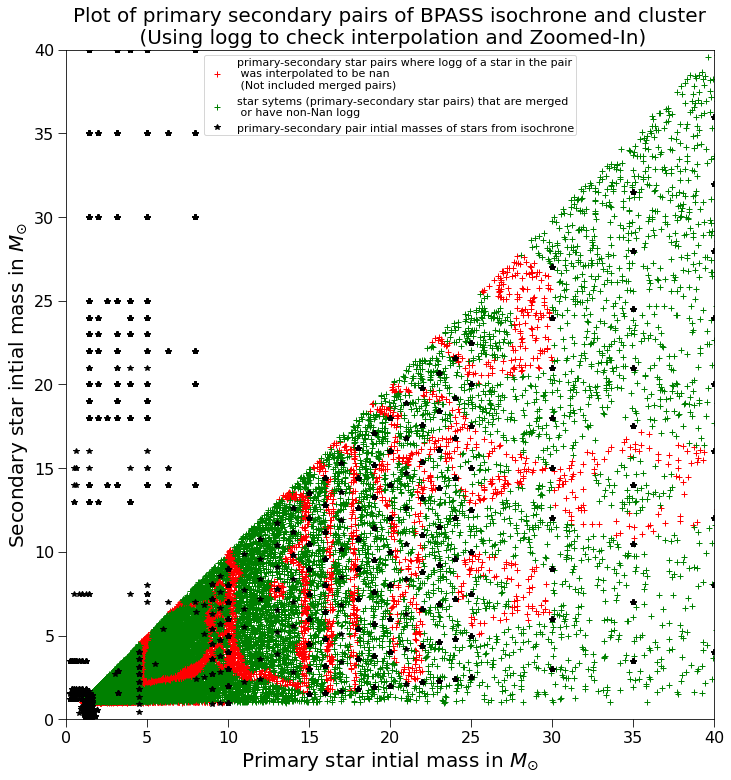

In [14]:
label1=("primary-secondary star pairs where " +
        "logg of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
label2=("star sytems (primary-secondary star pairs) that" +
        " are merged\n or have non-Nan logg")
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using logg to check interpolation and Zoomed-In)",
             "LogGT2S1.png")

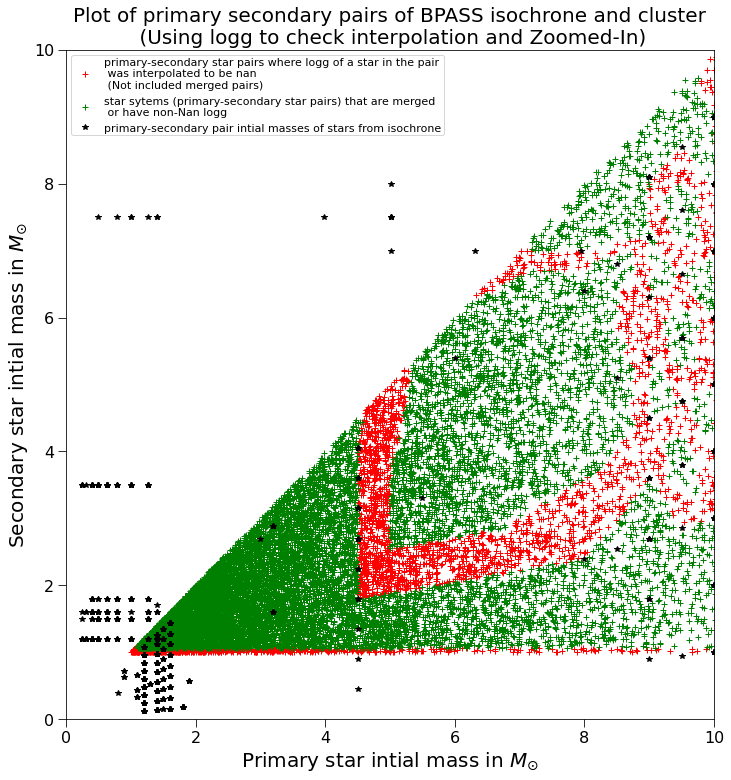

In [15]:
plot_scatter(BPASS_Cluster, (0, 10.0), (0, 10.0), label1, label2,
             title_default +
             "\n (Using logg to check interpolation and Zoomed-In)",
             "LogGT2S1Zoomed1.png")

Kind of wonky test I added; after all isWR does not operate in the same manner as does the 

In [16]:
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None, tests='isWR')

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff
Interpolation for: L
Interpolation for: logg
Interpolation for: isWR
Interpolation for: mass_current
Interpolation for: phase
Interpolation for: m_nirc2_Kp


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


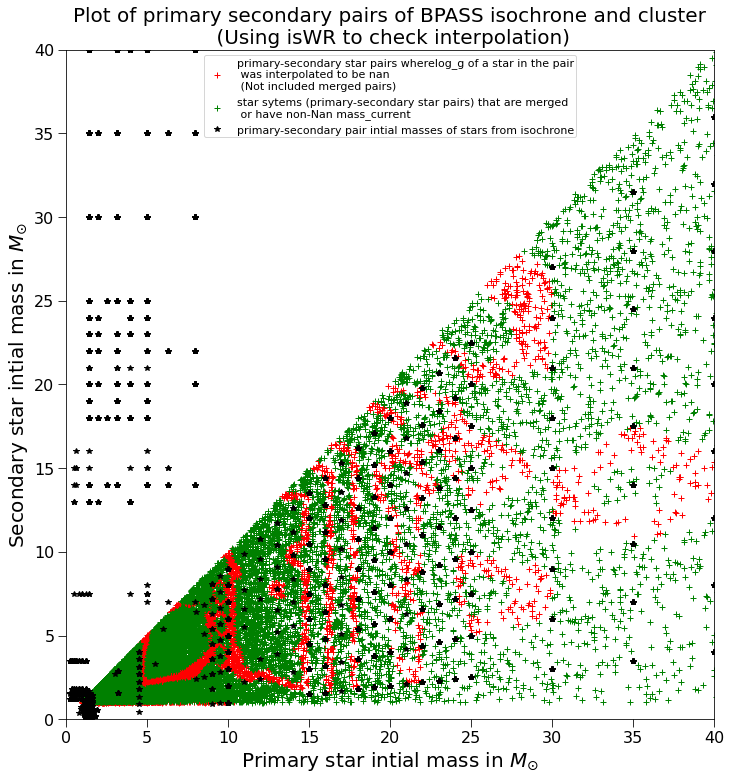

In [17]:
label1=("primary-secondary star pairs where" +
        "log_g of a star in the pair\n " +
        "was interpolated to be nan \n (Not included merged pairs)")
label2=("star sytems (primary-secondary star pairs) that" +
        " are merged\n or have non-Nan mass_current")
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using isWR to check interpolation)",
             "Scatter1T2S1WR.png")

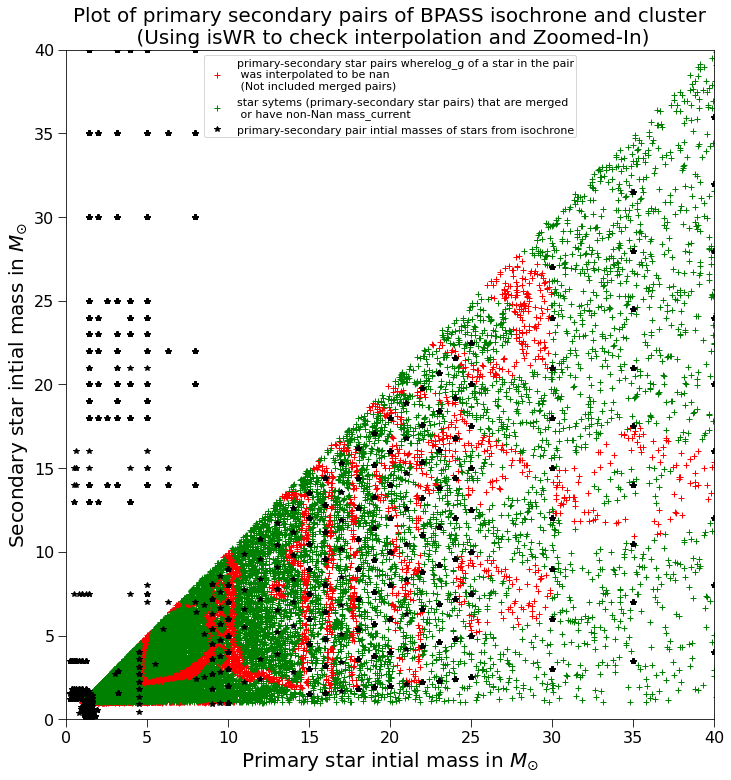

In [18]:
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using isWR to check interpolation and Zoomed-In)",
             "Scatter1T2S1ZoomedIN1WR.png")

In [19]:
len(BPASS_Cluster.rejected_prims)/len(BPASS_Cluster.good_systems)

0.24474280887387187

Now, we compare the stars to the stars unmatchable by the Spring-2021 BPASS-incorporation. Since overlaying the existing three-color plot with the old-Spring-2021 based plot would be confusing, let's just create a scatter plot of cluster stars that ended up not being able to be matched due to the KD-tree based scheme.

In [20]:
from astropy.table import Table
old_BPASS_bad_puntos = Table.read("compareOldCluster1Bad.fits",
                                  format='fits')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Bitstream Vera Sans


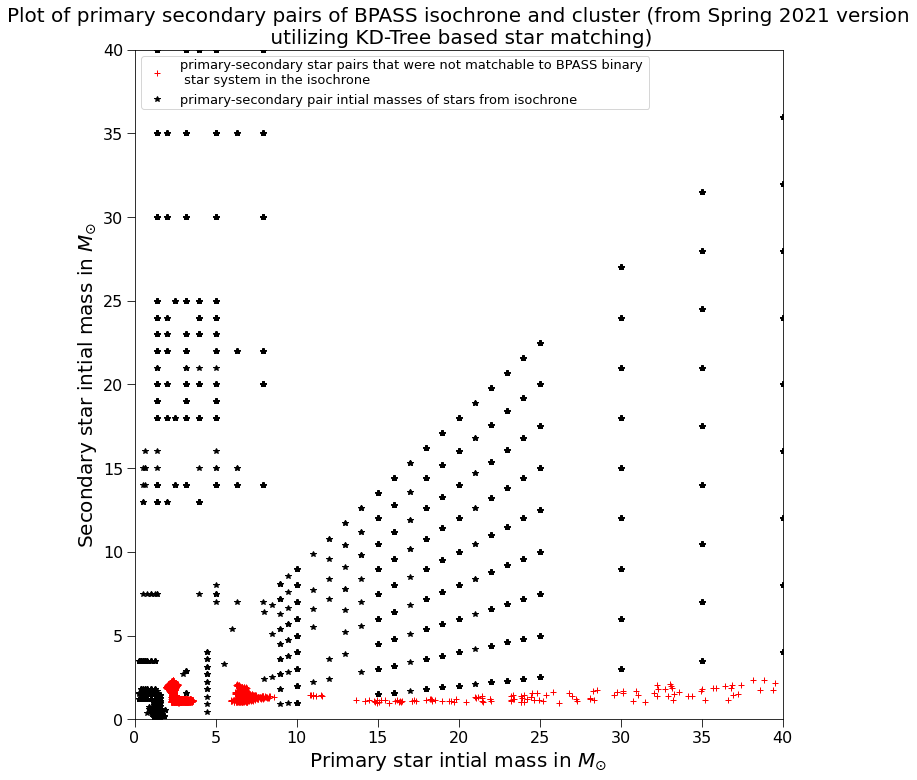

In [21]:
py.figure(figsize = (12, 12))
py.plot(old_BPASS_bad_puntos['Initial Primary Mass'],
        old_BPASS_bad_puntos['Initial Secondary Mass'],
        "r+",  label="primary-secondary star pairs that were not matchable to BPASS binary" +
        " \n star system in the isochrone")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pair intial masses of stars from isochrone")
py.xlim(0, 40.0)
py.ylim(0, 40.0)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster" +
         " (from Spring 2021 version\n utilizing KD-Tree based star matching)")
py.legend(prop={'size' : 13})
py.savefig("Bad_Old_BPASS.png")

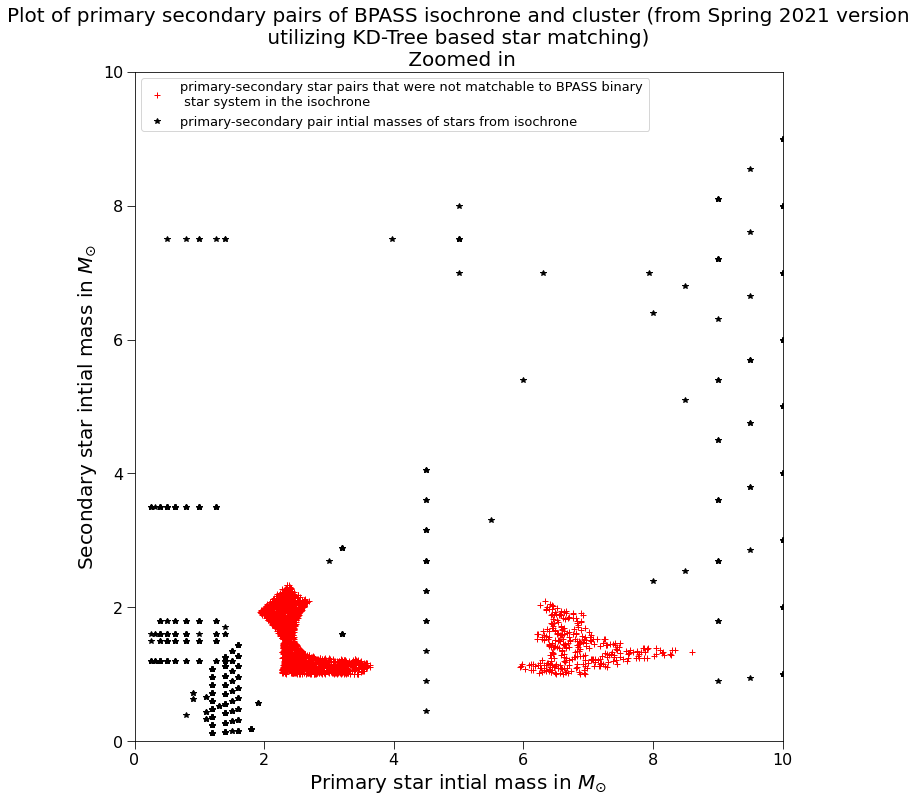

In [22]:
py.figure(figsize = (12, 12))
py.plot(old_BPASS_bad_puntos['Initial Primary Mass'],
        old_BPASS_bad_puntos['Initial Secondary Mass'],
        "r+",  label="primary-secondary star pairs that were not matchable to BPASS binary" +
        " \n star system in the isochrone")
py.plot(BPASS_iso.primaries['mass'],
        BPASS_iso.secondaries['mass'],
        "k*", label="primary-secondary pair intial masses of stars from isochrone")
py.xlim(0, 10.0)
py.ylim(0, 10.0)
py.xlabel("Primary star intial mass in $M_{\odot}$")
py.ylabel("Secondary star intial mass in $M_{\odot}$")
py.title("Plot of primary secondary pairs of BPASS isochrone and cluster" +
         " (from Spring 2021 version\n utilizing KD-Tree based star matching)" +
         " \n Zoomed in")
py.legend(prop={'size' : 13})
py.savefig("Bad_Old_BPASS2.png")

Now seeing which star pairs had their Teff and L values improperly interpolated

In [23]:
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None, tests='Teff')

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff
Interpolation for: L
Interpolation for: logg
Interpolation for: isWR
Interpolation for: mass_current
Interpolation for: phase
Interpolation for: m_nirc2_Kp


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


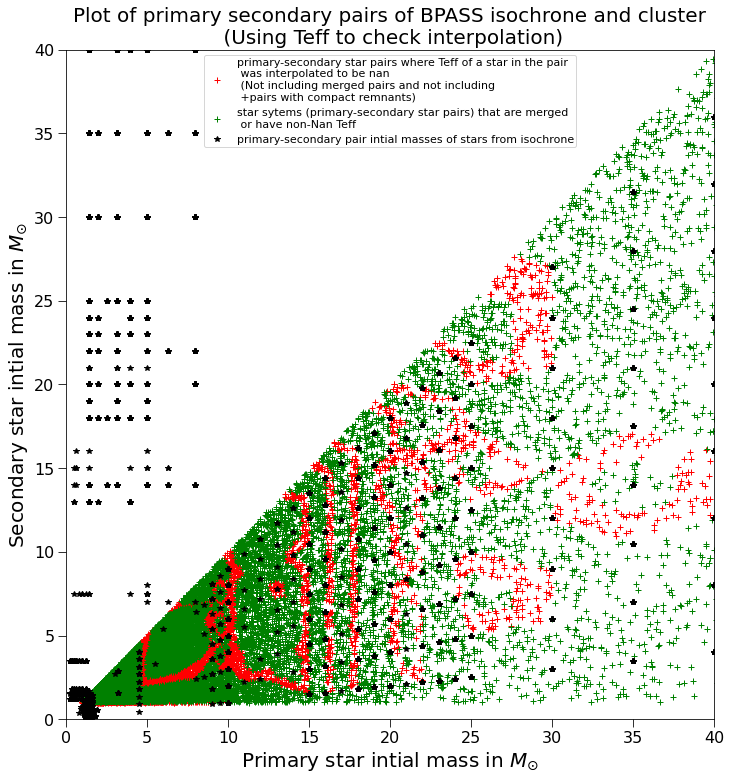

In [24]:
label1=("primary-secondary star pairs where " +
        "Teff of a star in the pair\n " +
        "was interpolated to be nan \n (Not including merged pairs and not including\n +"
        "pairs with compact remnants)")
label2=("star sytems (primary-secondary star pairs) that" +
        " are merged\n or have non-Nan Teff")
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using Teff to check interpolation)",
             "Scatter1T2S1Teff.png")

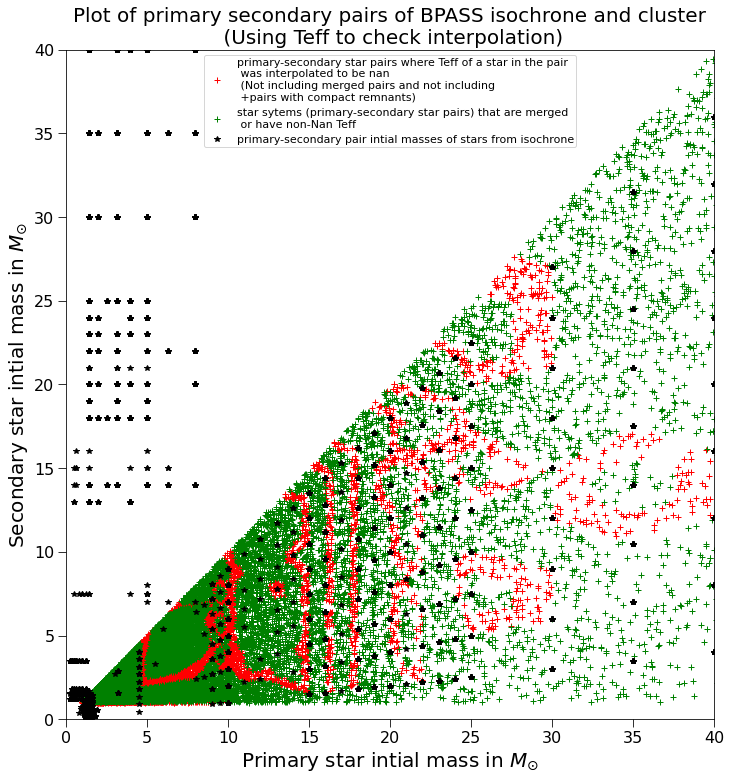

In [25]:
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using Teff to check interpolation)",
             "Scatter1T2S1Teff.png")

Now trying to explore which stars had their L interpolated properly and which did not. Note that I did have to change the algorithm determining that as a star's luminosity can equal a NaN value when the star is a compact remnant.

In [26]:
BPASS_Cluster = synthetic.Cluster_w_Binaries(BPASS_iso, custom_IMF,
                                             1000000,
                                             ifmr=None, tests='L')

/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:752: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Interpolation for: Teff
Interpolation for: L
Interpolation for: logg
Interpolation for: isWR
Interpolation for: mass_current
Interpolation for: phase
Interpolation for: m_nirc2_Kp


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


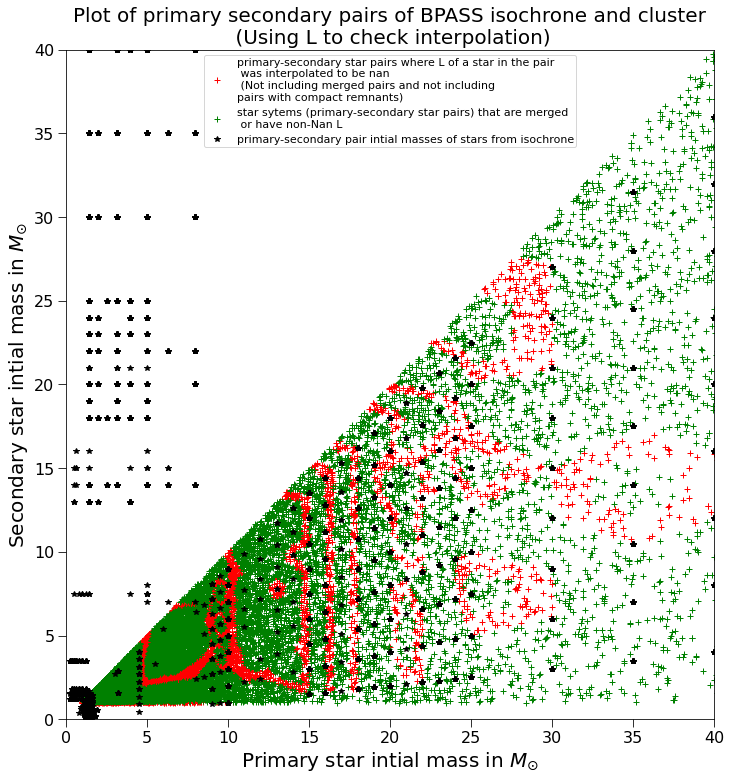

In [27]:
label1=("primary-secondary star pairs where " +
        "L of a star in the pair\n " +
        "was interpolated to be nan \n (Not including merged pairs and not including\n" +
        "pairs with compact remnants)")
label2=("star sytems (primary-secondary star pairs) that" +
        " are merged\n or have non-Nan L")
plot_scatter(BPASS_Cluster, (0, 40.0), (0, 40.0), label1, label2,
             title_default +
             "\n (Using L to check interpolation)",
             "Scatter1T2S1L.png")

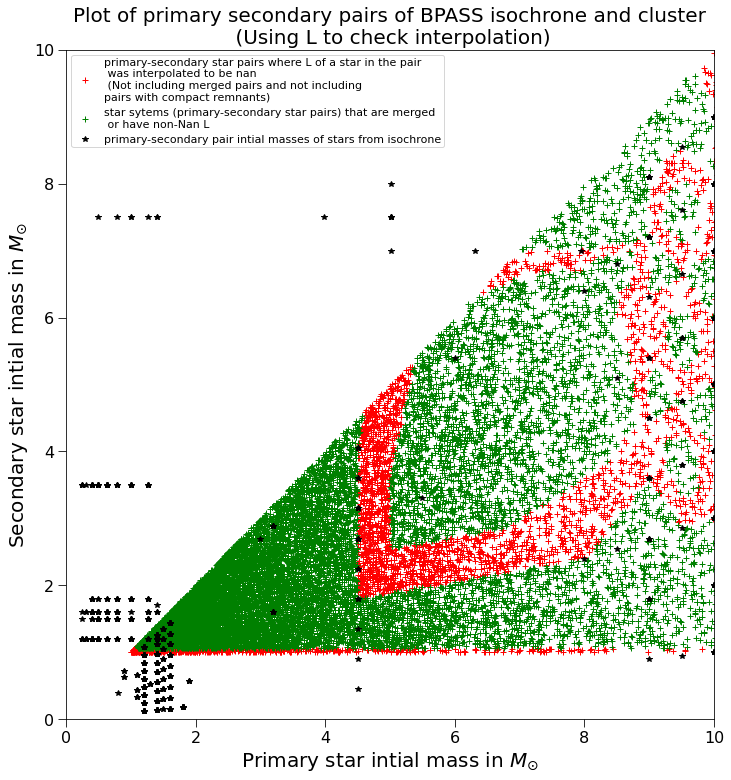

In [28]:
plot_scatter(BPASS_Cluster, (0, 10.0), (0, 10.0), label1, label2,
             title_default +
             "\n (Using L to check interpolation)",
             "Scatter1T2S1LZoomed.png")